In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras


In [147]:
# Mnist comes with Keras by default so we simply load the test and train files using the codes below

mnist = keras.datasets.mnist

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

### Exploring the Data 

mnist (Modified National Institute of Standards and Technolog) dataset is a collection of 28 x 28 pixel images showing hand-written representations of the digits 0-9. Every mnist datapoint has two parts: the image of a handwritten digit (x) and the corresponding label(y), Both the training set and the test set contains images and the corresponding labels.

In [148]:
# Let's have a look at the shape of the datasets

print('Train_images = {}'.format(train_images.shape))
print('Train_labels = {}'.format(train_labels.shape))
print('Test_images = {}'.format(test_images.shape))
print('Test_labels = {}'.format(test_labels.shape))

Train_images = (60000, 28, 28)
Train_labels = (60000,)
Test_images = (10000, 28, 28)
Test_labels = (10000,)


In [26]:
class_labels = np.unique(train_labels)

print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


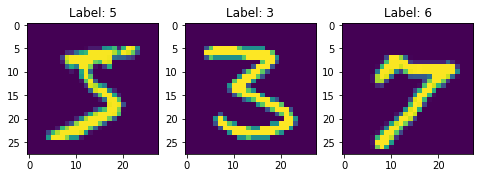

In [49]:
#Visualize the images

plt.figure(figsize=(8, 5))


plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))


plt.subplot(1,3,2)
plt.imshow(train_images[2506])
plt.title("Label: {}".format(train_labels[2506]))


plt.subplot(1,3,3)
plt.imshow(test_images[9000])
plt.title("Label: {}".format(train_labels[9000]))

plt.show()



### Data Processing 

In [41]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255.
# Dividing the data by 255 scales to the required range. This normalization is done to help with the training.

train_images = train_images / 255.0
test_images = test_images / 255.0

###### We then partition this dataset further and create a validation set. In other words, a training set is used to fit the parameters, validation set is used to tune the parameters while the trained classifier is evaluated on the test set.

In [45]:
x_train = train_images[:50000]
x_val = train_images[50000:]
y_train = train_labels[:50000]
y_val = train_labels[50000:]

print('x_train: {}'.format(x_train.shape))
print('x_val: {}'.format(x_val.shape))
print('y_train {}'.format(y_train.shape))
print('y_val {}'.format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train (50000,)
y_val (10000,)


In [50]:
# one-hot encoding using keras' numpy-related utilities

from tensorflow.keras.utils import to_categorical

no_labels = 10

y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [53]:
# Flattening the images from the 2D 28x28 pixels to 1D 784 pixels

new_dimension = np.prod(train_images.shape[1:])

x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
x_test = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) 
print("x_val: {}".format(x_val.shape))
print("x_test: {}".format(x_test.shape)) 

x_train: (50000, 784)
x_val: (10000, 784)
x_test: (10000, 784)


In [59]:
import tensorflow.compat.v1 as tf 

tf.disable_v2_behavior()

X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [84]:
# creating  model architecture

def multilayer_perceptron(x, no_classes, first_layer_neurons = 256, second_layer_neurons = 128):
    
    #first layer 
    
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    
    #second layer 
    
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    
    
    #output layer 
    
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    
    return logits

    

In [86]:
#call the multilayer perceptron function 

logits = multilayer_perceptron(X, no_labels)


learning_rate = 0.01

#we define the loss and optimiser for the network

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)



In [113]:
#initialize the variables 
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size


# Training the  Model 
with tf.Session() as session:
    session.run(init)
    for epoch in range(epochs):
        average_cost = 0
        start, end = 0, batch_size
        
        
        for i in range(iteration):
            batch_x, batch_y = x_train[start: end], y_train[start: end]
            _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
            start += batch_size
            end += batch_size 
            
            
             #average loss
        average_cost += loss/iteration
        print("Epoch========{}".format(epoch))
            
            #evaluate model

    prediction = tf.nn.softmax(logits)
    ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
    print("Accuracy: {}".format(accuracy.eval({X: x_test, Y: y_test})))

        
    


Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.911300003528595


### Optimization for training deep neural networks

In [114]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


#Build the model object
model = Sequential()


# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))


# Build the output layer
model.add(Dense(no_labels, activation='softmax'))

Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other loss functions are available.

As for the optimizer of choice we'll use Adam with default settings. We could also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do.

We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training/testing.

In [115]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size).

In [116]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - ETA: 0s - loss: 0.7036 - acc: 0.8111

C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 6s 118us/sample - loss: 0.7036 - acc: 0.8111 - val_loss: 0.2661 - val_acc: 0.9242
Epoch 2/20
50000/50000 [==============================] - 5s 102us/sample - loss: 0.2395 - acc: 0.9311 - val_loss: 0.1852 - val_acc: 0.9498
Epoch 3/20
50000/50000 [==============================] - 5s 97us/sample - loss: 0.1738 - acc: 0.9503 - val_loss: 0.1525 - val_acc: 0.9569
Epoch 4/20
50000/50000 [==============================] - 5s 98us/sample - loss: 0.1351 - acc: 0.9608 - val_loss: 0.1296 - val_acc: 0.9653
Epoch 5/20
50000/50000 [==============================] - 5s 104us/sample - loss: 0.1101 - acc: 0.9681 - val_loss: 0.1173 - val_acc: 0.9675
Epoch 6/20
50000/50000 [==============================] - 5s 94us/sample - loss: 0.0901 - acc: 0.9738 - val_loss: 0.1048 - val_acc: 0.9694
Epoch 7/20
50000/50000 [==============================] - 5s 95us/sample - loss: 0.0762 - acc: 0.9778 - val_loss: 0.0941 - val_acc: 0.9742
Epoch 8/20
50000/50000 [===========

Text(0.5, 1.0, 'Loss Curves - before regularisation')

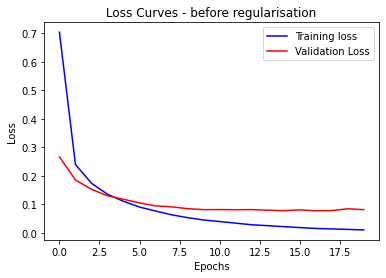

In [117]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Although the validation and training loss seem great, we can see that the validation #loss increases. This identifies overfitting in our network. How do we proceed? #Introduce regularisation to the model.


In [118]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])


reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)


test_loss, test_accuracy = reg_model.evaluate(x_test, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 137us/sample - loss: 1.0059 - acc: 0.6816 - val_loss: 0.2879 - val_acc: 0.9153
Epoch 2/20
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3718 - acc: 0.8906 - val_loss: 0.1984 - val_acc: 0.9423
Epoch 3/20
50000/50000 [==============================] - 6s 122us/sample - loss: 0.2771 - acc: 0.9180 - val_loss: 0.1590 - val_acc: 0.9546
Epoch 4/20
50000/50000 [==============================] - 6s 118us/sample - loss: 0.2295 - acc: 0.9325 - val_loss: 0.1389 - val_acc: 0.9591
Epoch 5/20
50000/50000 [==============================] - 6s 117us/sample - loss: 0.1965 - acc: 0.9420 - val_loss: 0.1196 - val_acc: 0.9637
Epoch 6/20
50000/50000 [==============================] - 6s 122us/sample - loss: 0.1704 - acc: 0.9501 - val_loss: 0.1088 - val_acc: 0.9680
Epoch 7/20
50000/50000 [==============================] - 6s 117us/sample - loss: 0.1550 - acc: 0.9553 - val_l

Text(0.5, 1.0, 'Loss Curves - after regularisation')

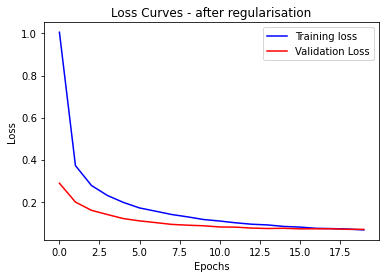

In [119]:
#Check for Overfitting

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

### Let's use our model to predict some images and labels.

In [143]:
predictions = model.predict([test_images])

print(np.argmax(predictions[5000]))

3


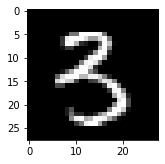

In [144]:
# Let's see whether the image would turn out to be 3
# Remember that the input data to the network were flattened (changed from 2D(28, 28 ), to 1D(784)). 
# Before displaying it, we need to convert it back to the size of 28 x 28 pixels.

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[5000].reshape(28,28), cmap="gray")
#plt.show()


In [140]:
#printing another entry 

print(np.argmax(predictions[1700]))

0


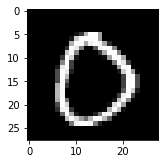

In [142]:
# Let's see whether the image would turn out to be 0

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1700].reshape(28,28), cmap='gray')